In [57]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Ideas:
    1. initalizing guess:
        A. rejection sampling relative to pdf
        B. convultion prior to rejection sampling 

In [2]:
#Special Ditribution Function
#'v' : array float: mu center of normal
#'s' : float: sigma standard deviation
def pdf(x,v,s):
    dist = 0
    num = len(v)
    for m in v:
        dist = dist + 1/(np.sqrt(2*np.pi)*s)*np.exp(-.5*((x-m)/s)**2)
    return dist/num


def Pdf(x,m,s):
    return 1/(np.sqrt(2*np.pi)*s)*np.exp(-.5*((x-m)/s)**2)

In [3]:
#Expectation Maximization Algorithm 1D using pdf
#Assumption: variance of all normals is the same
#INPUTS:
# 'x' array : positions for probability density values
# 'p': array : probabilty density values over 'x'
# 'guess': array :initial 'k' guesses of centers of normals
# 'ite': int : number of iterations for EM 
#OUTPUTS:
# 'mu' : array : values of centers of normal
def EM(x,p,guess,ite):
    k = len(guess)
    n = len(x)
    
    #likelihood function (includes prior)
    #alt: prior = could np.sum(p*likeli)/np.sum(p)
    likeli = np.zeros((k,n))
    
    for j in range(ite):
        for i in range(k):
            likeli[i,:] = p*Pdf(x,guess[i],1)
        norm = np.sum(likeli, axis = 0)
        likeli = likeli/norm
        
        #weighted center of mass given likeli with prior
        guess = np.nansum(likeli*x*p, axis = 1)/np.nansum(likeli*p, axis = 1)
    mu = guess
    return mu

#Includes graphical output
def EM_graph(x,p,guess,ite):
    k = len(guess)
    n = len(x)
    
    plt.title('Intial distibution with guesses')
    plt.plot(x,p)
    plt.vlines(guess, 0, np.max(p)*1.02, 'b')
    plt.show()
    
    #likelihood function (includes prior)
    #alt: prior = could np.sum(p*likeli)/np.sum(p)
    likeli = np.zeros((k,n))
    
    plt.title('Probability within set and sequence of centers')
    plt.plot(x,p)
    plt.vlines(guess, 0, np.max(p)*1.02, 'b')
    
    for j in range(ite):
        for i in range(k):
            likeli[i,:] = p*Pdf(x,guess[i],1)
        norm = np.sum(likeli, axis = 0)
        likeli = likeli/norm
        
        #weighted center of mass given likeli with prior
        guess = np.nansum(likeli*x*p, axis = 1)/np.nansum(likeli*p, axis = 1)
        #plt.vlines(guess, 0, np.max(p)*1.02, 'r')
    for l in range(k):
        plt.plot(x,likeli[l])
    plt.show()
    mu = guess
    return mu

In [50]:
#Chooses BEST of a number of randomly intialized
#Expectation Maximization Algorithm (1D using pdf)
#Assumption: variance of all normals is the same
#INPUTS:
# 'x' array : positions for probability density values
# 'p': array : probabilty density values over 'x'
# 'k': int : number of centers to find
# 'ite': int : number of subiterations for EM 
# 'num': int : number of EM runs in set to choose best from
#OUTPUTS:
# 'mu' : array : best from set of values for centers of normal
def best_EM(x,p,k,ite,num,dist = False):
    #matrix with rows of centers after each individual EM run
    M = np.empty((num,k))
    
    #L_2 loss of output
    L = np.empty(num)
    
    for j in range(num):
        g = np.random.rand(k)*100
        m = EM(x,p,g,ite)
        P = pdf(x,m,s)
        M[j,:] = m
        L[j] = np.mean((p-P)**2)
    ind = np.argmin(L)
    if dist == True:
        return L
    else:
        return M[ind], L[ind]

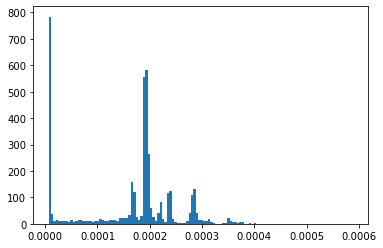

In [65]:
#Distribution of the quality of solutions
k = 5
L = 0
grades = L + np.random.rand(k)*(100-L)
#grades = np.array([8,15,35,50,68])

n = 10000
s = 1.9
x = np.linspace(0,100,n)
p = pdf(x,grades,s)
# plt.plot(x,p)
# plt.show()

N = 4000
plt.hist(best_EM(x,p,5,5,N, True),bins = 2*int(np.sqrt(N)))
plt.show()

In [ ]:
#Pull out best solution and graph 
#grades = np.array([60,70,80])
k = 30
L = 0
#grades = L + np.random.rand(k)*(100-L)
grades = np.array([8,15,35,46,68])

n = 10000
s = 1.9
x = np.linspace(0,100,n)
p = pdf(x,grades,s)
plt.plot(x,p)
plt.show()

m, l = best_EM(x,p,5,100,40, False)
P = pdf(x,m,s)
plt.plot(x,p)
plt.plot(x,P)
#plt.scatter(grades, np.zeros(k))
#plt.scatter(m, np.zeros(k), color = 'r')
plt.show()
print(l)

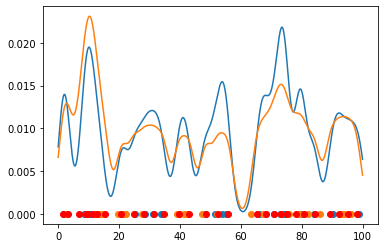

7.3393900864246475e-06


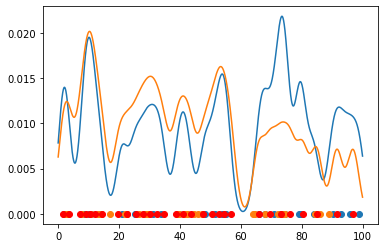

1.596827186568924e-05


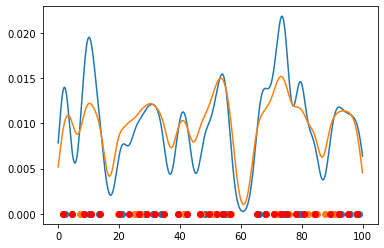

6.036814425503024e-06


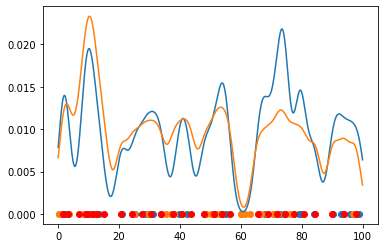

9.950100169932388e-06


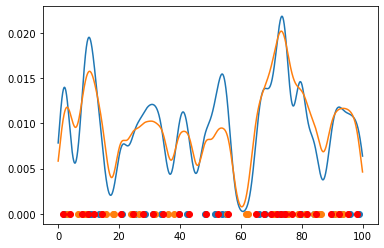

3.988257316375575e-06


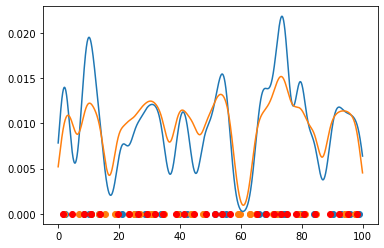

6.368038924874473e-06


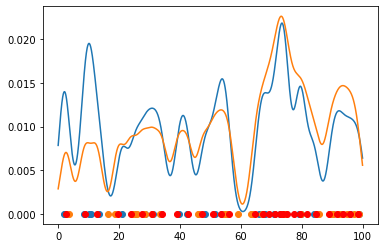

1.0872943001562447e-05


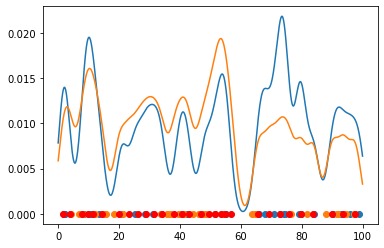

1.3343153631393967e-05


In [ ]:
#Simulation of solutions
for q in range(10):
    g = np.random.rand(k)*100
    #print(np.sort(EM_graph(x,p,g,200)))
    #print(np.sort(grades))
    m = EM(x,p,g,800)
    P = pdf(x,m,s)
    plt.plot(x,p)
    plt.plot(x,P)
    plt.scatter(grades, np.zeros(k))
    plt.scatter(g, np.zeros(k))
    plt.scatter(m, np.zeros(k), color = 'r')
    plt.show()
    print(np.mean((p-P)**2))
#print(np.sum(pdf(x,EM(x,p,g,200),s))*dx,np.sum(p)*dx)

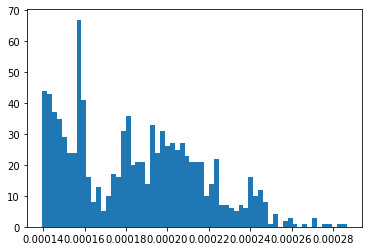

In [70]:
#Distribution of the quality of solutions
k = 30
L = 0
grades = L + np.random.rand(k)*(100-L)
#grades = np.array([8,15,35,50,68])

n = 10000
s = 1.9
x = np.linspace(0,100,n)
p = pdf(x,grades,s)
# plt.plot(x,p)
# plt.show()

N = 1000
plt.hist(best_EM(x,p,5,5,N, True),bins = 2*int(np.sqrt(N)))
plt.show()